# INDIA Covid-19 Analysis 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install bar_chart_race

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import datetime
import requests
import warnings
from IPython.display import HTML
import bar_chart_race as bcr
warnings.filterwarnings('ignore')

In [ ]:
ageGroup = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
covid_19_india = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
hospitalBeds = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
icmrTestLabs = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
indiDetails = pd.read_csv('../input/covid19-in-india/IndividualDetails.csv')
indiaCencus = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
stateDetails = pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')

# Global Spread of Coronavirus

In [ ]:
corona_data=pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
choro_map=px.choropleth(corona_data, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

# Spread in India

In [ ]:
covid_19_india=pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv',index_col='Date')
covid_19_india

In [ ]:
df_cases = covid_19_india.loc[:, ['State/UnionTerritory', 'Confirmed']]

In [ ]:
df_cases.reset_index(inplace=True)

In [ ]:

df_cases

In [ ]:
df_cases['Date']=pd.to_datetime(df_cases['Date'],format="%d/%m/%y")


# Visualizing Active cases ,deaths ,and recovered cases

In [ ]:
df_confirmed_deaths_cured = covid_19_india.loc[:, ['State/UnionTerritory', 'Confirmed','Deaths','Cured']]
df_confirmed_deaths_cured.index=pd.to_datetime(df_confirmed_deaths_cured.index,format="%d/%m/%y")
df_confirmed_deaths_cured.tail()



In [ ]:
df1=df_confirmed_deaths_cured.reset_index()
df1=df1.groupby('Date').sum()
df1.reset_index(inplace=True)
df2=df1.tail(25)
plt.figure(figsize=(14,8))
sns.barplot(data=df2,x='Date',y='Confirmed',color=sns.color_palette('Set3')[3],label='Confirmed')
sns.barplot(data=df2,x='Date',y='Cured',color=sns.color_palette('Set3')[4],label='Cured')
sns.barplot(data=df2,x='Date',y='Deaths',color=sns.color_palette('Set3')[5],label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)
plt.legend(frameon=True,fontsize=12)



In [ ]:

plt.figure(figsize= (14,8))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(data=df1,y= 'Confirmed',x= 'Date',label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(data=df1,y= 'Cured',x= 'Date',label = 'Cured',linestyle ='-',color = 'g')
ax3 = plt.plot_date(data=df1,y= 'Deaths',x= 'Date',label = 'Death',linestyle ='-',color = 'r')
plt.legend();

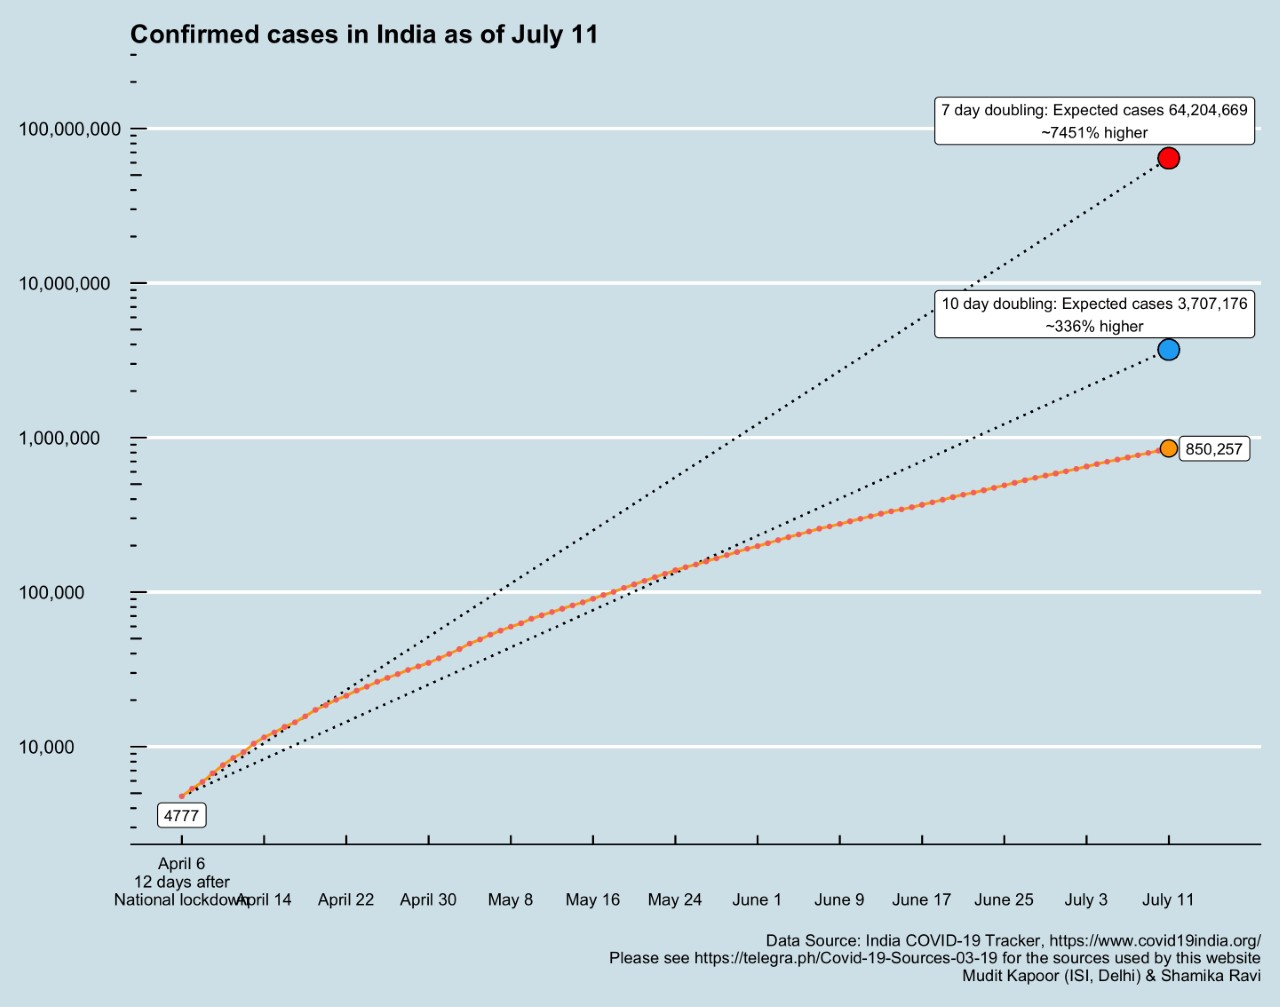

# Statewise Cure Rate and Death rate

![](http://![image.png](attachment:image.png))

In [ ]:
state_cases=df_confirmed_deaths_cured.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - abs((state_cases['Deaths']- state_cases['Cured']))
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Reds',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Cure Rate (per 100)"])

# State Wise Cases Analysis 

In [ ]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']
df5=df_confirmed_deaths_cured.copy()
df5.reset_index(inplace=True)


plt.figure(figsize=(20,60))

for i,state in enumerate(states_list):
    plt.subplot(7,2,i+1)
    df4=df5[df5['State/UnionTerritory']==state]
    df4=df4.tail(15)
    plt.bar(df4.Date,df4.Confirmed,label='Confirmed')
    
    plt.xticks(rotation=90)
    plt.title(state)
    plt.ylabel('Total Cases')
    plt.xlabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()

# Analyze the 4 major States i.e Maharashtra , Delhi , Tamil Nadu , Gujarat

# Maharashtra

In [ ]:
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_maharashtra = df[(df['State/UnionTerritory']=='Maharashtra')]
plt.figure(figsize=(8,8))
plt.plot(df_maharashtra['Date'],df_maharashtra['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20', 74 ), xytext=('23/03/20',45000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',2687), xytext=('15/04/20',50000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',12974), xytext=('04/05/20',55000),ha='center', 
            
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',33053), xytext=('18/05/20',65000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',85975), xytext=('08/06/20',15000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 



df_test = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_maharashtra_test=df_test[(df_test['State']=='Maharashtra')]
plt.figure(figsize=(8,8))
plt.plot(df_maharashtra_test['Date'],df_maharashtra_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-04-15', 45142), xytext=('2020-04-15',150000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-05-04',168374), xytext=('2020-05-04',5000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2020-05-18',282437), xytext=('2020-05-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2020-06-08',565290), xytext=('2020-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


Maharashtra is with the highest number of corona cases .above we can see that their rate of testing is incrasing at a good rate but so is the confirmed cases

# Delhi

In [ ]:
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_delhi = df[(df['State/UnionTerritory']=='Delhi')]
plt.figure(figsize=(8,8))
plt.plot(df_delhi['Date'],df_delhi['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20',29), xytext=('23/03/20',15000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',1561), xytext=('15/04/20',25000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',4549), xytext=('04/05/20',35000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',10054), xytext=('18/05/20',45000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',27654), xytext=('08/06/20',5000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


df_test = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_delhi_test=df_test[(df_test['State']=='Delhi')]
plt.figure(figsize=(8,8))
plt.plot(df_delhi_test['Date'],df_delhi_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-04-15',16605), xytext=('2020-04-15',55000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-05-04',64108), xytext=('2020-05-04',15000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2020-05-18',139727), xytext=('2020-05-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2020-06-08',255615), xytext=('2020-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


As we can see the cases have been rising eversince the first lockdown and event though the lockdowns helped in keeping the rate of increase in check,after the unlock as we can see in the graph the rate has increased a lot

The testing has also seen a great amount of increase in Delhi but compared to the cases ,it is a bit underwhelming and also a fact to look at is the testing started around lockdown 2.the rate as we can see has a constant rate of increase ulike the cases graph but we can observe after the unlock the rate at which testing is done has seen a massive increase

# Tamil Nadu

In [ ]:
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_tn = df[(df['State/UnionTerritory']=='Tamil Nadu')]
plt.figure(figsize=(8,8))
plt.plot(df_tn['Date'],df_tn['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20',9), xytext=('23/03/20',9000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',1204), xytext=('15/04/20',10000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',3023), xytext=('04/05/20',15000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',11224), xytext=('18/05/20',20000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',31667), xytext=('08/06/20',10000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 

df_test = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_tn_test=df_test[(df_test['State']=='Tamil Nadu')]
plt.figure(figsize=(8,8))
plt.plot(df_tn_test['Date'],df_tn_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-04-15', 21994), xytext=('2020-04-15',150000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-05-04',162970), xytext=('2020-05-04',5000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2020-05-18',337841), xytext=('2020-05-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2020-06-08',607952), xytext=('2020-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 

# Gujarat

In [ ]:
df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_guj = df[(df['State/UnionTerritory']=='Gujarat')]
plt.figure(figsize=(8,8))
plt.plot(df_guj['Date'],df_guj['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20',29), xytext=('23/03/20',5000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',695), xytext=('15/04/20',10000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',5428), xytext=('04/05/20',15000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',11379), xytext=('18/05/20',20000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',20070), xytext=('08/06/20',10000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 


df_test = pd.read_csv("../input/covid19-in-india/StatewiseTestingDetails.csv")
df_guj_test=df_test[(df_test['State']=='Gujarat')]
plt.figure(figsize=(8,8))
plt.plot(df_guj_test['Date'],df_guj_test['TotalSamples'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Total Samples')
plt.title('Dates V/S Total Samples')
ax.annotate('Lockdown 2', xy =('2020-04-15',19197), xytext=('2020-04-15',55000),ha='center',
                arrowprops = dict(facecolor ='Blue',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('2020-05-04',84648), xytext=('2020-05-04',15000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('2020-05-18',148824), xytext=('2020-05-18',185000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('2020-06-08',256289), xytext=('2020-06-08',200000),ha='center',
                arrowprops = dict(facecolor ='orange',shrink = 0.05),) 

df = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
df_delhi = df[(df['State/UnionTerritory']=='Gujarat')]
df_dt=df_delhi[(df_delhi['Date']=='06/07/20')]


labels = 'Cured', 'Death', 'Unknown'
sizes = [71.8,0.05,28.15]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


gujarat done very low testing at the starting

So from the above graphs i can conclude that while lockdown beneficial and with the unlock the above graphs clearly show that the rate has increased rapidly.

# Age Group Analysis

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=ageGroup,x='AgeGroup',y='TotalCases',color=sns.color_palette('Set3')[0])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Cases')
for i in range(ageGroup.shape[0]):
    count = ageGroup.iloc[i]['TotalCases']
    plt.text(i,count+1,ageGroup.iloc[i]['Percentage'],ha='center')
    
from IPython.display import display, Markdown

As we can see maximum number of cases are of age group 20-69

In [ ]:
state_testing=stateDetails.groupby('State')['TotalSamples','Negative','Positive'].max().reset_index()
testing=state_testing.sort_values(['TotalSamples'], ascending=False)
testing

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(data=testing,x='TotalSamples',y='State',color=sns.color_palette('Set3')[0],orientation='horizontal',label='total samples')
sns.barplot(data=testing,x='Positive',y='State',color=sns.color_palette('Set3')[1],orientation='horizontal',label='total positive cases')
plt.title('Testing statewise insight')
plt.legend(frameon=True,fontsize=12)

# Health Care Analysis 

In [ ]:
hospitalBeds=hospitalBeds.groupby('State/UT').max()
hospitalBeds.reset_index(inplace=True)

In [ ]:
hospitalBeds

In [ ]:
d=pd.read_csv('../input/covid19-in-india/StatewiseTestingDetails.csv')
d.groupby('State')['TotalSamples','Positive'].max()

In [ ]:
df_active=covid_19_india.groupby('State/UnionTerritory').max()
df_active['active']=df_active['Confirmed']- df_active['Cured']- df_active['Deaths']
df_active.reset_index(inplace=True)
df_active


In [ ]:
df_beds_vs_patients=pd.merge(hospitalBeds, df_active, left_on='State/UT', right_on='State/UnionTerritory').drop('State/UnionTerritory', axis=1)


plt.figure(figsize=(14,14))

sns.barplot(data=df_beds_vs_patients,y='State/UT',x='NumPublicBeds_HMIS',color=sns.color_palette('RdBu')[5],label='beds available')
sns.barplot(data=df_beds_vs_patients,y='State/UT',x='active',color='r',label='active cases')
plt.title('Total Beds per states')
plt.xlabel('Count')
plt.ylabel('States')
plt.legend(frameon=True,fontsize=12)

We need  more number of beds as  number of patients are increasing . we need more beds in states like Delhi and maharashtra

# Flattening the curve 

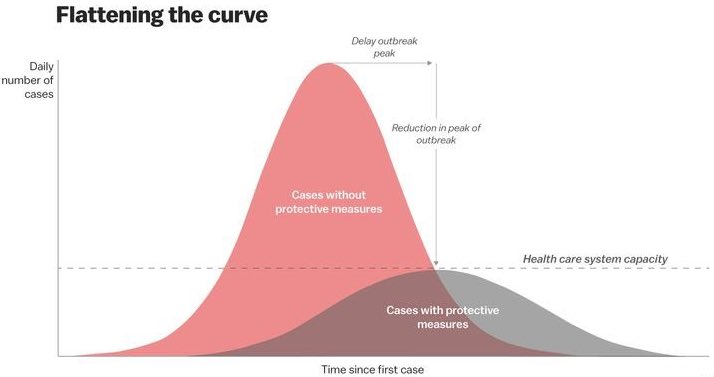

You might have heard the phrase 'Flatten The Curve'. But what does it really mean? How can data identify if the curve is flattening or not? Let's look at the trend of all the states and the overall numbers of the country.

In [ ]:
df_india=df_cases.groupby('Date').sum()
daily_cases=[1.0]
for i in range(1,len(df_india)):
    daily_cases.append(df_india['Confirmed'].iloc[i]-df_india['Confirmed'].iloc[i-1])
 
df_india['daily_cases']=daily_cases


In [ ]:
df_india

In [ ]:
df_india.reset_index(inplace=True)
plt.figure(figsize=(8,8))
plt.title('Daily new cases')
plt.plot(df_india['Date'],df_india['daily_cases'],'-r')
plt.rc("xtick",labelsize=9)
plt.xticks(rotation=45)
plt.rc("ytick",labelsize=10)

In [ ]:
def find_daily_cases(state):
    df_cases_state=df_cases[df_cases['State/UnionTerritory']== state].groupby('Date').sum()
    daily_cases=[df_cases_state['Confirmed'].iloc[0]]
    for i in range(1,len(df_cases_state)):
        daily_cases.append(df_cases_state['Confirmed'].iloc[i]-df_cases_state['Confirmed'].iloc[i-1])
    df_cases_state['daily_cases']=daily_cases
    return df_cases_state
        
    
    

In [ ]:
states_list=['Maharashtra','Gujarat','Delhi','Rajasthan','Madhya Pradesh','Tamil Nadu','Uttar Pradesh','Andhra Pradesh',
            'West Bengal','Karnataka','Kerala','Jammu and Kashmir','Punjab','Haryana']

plt.figure(figsize=(30,30))

for i,state in enumerate(states_list):
    df_state=find_daily_cases(state)
    df_state=df_state.reset_index()
    df_state=df_state.tail(15)
    plt.subplot(4,4,i+1)
    plt.title(state)
    plt.plot(df_state['Date'],df_state['daily_cases'],'-r')
    plt.rc("xtick",labelsize=9)
    plt.xticks(rotation=45)
    plt.rc("ytick",labelsize=10)

<font size="+1" color=purple ><b> I hope you enjoyed this kernel , Please don't forget to appreciate me with an Upvote.</b></font>